# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [68]:
import pandas as pd 
#you can say ../../desktop/python, etc
df = pd.read_csv("data/weedprices01012015.csv", na_values = "I feel bad for these guys -->")
df.head(10).sort_values('HighQ')

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
2,Arizona,298.51,2638,209.43,2426,NaN,306
9,Florida,300.88,9369,217.05,8166,NaN,695
1,Alaska,303.02,350,270.45,475,NaN,37
6,Connecticut,337.26,1835,267.99,2069,NaN,126
0,Alabama,337.54,1539,208.24,1463,NaN,182
3,Arkansas,341.68,846,207.20,836,NaN,145
8,District of Columbia,348.66,657,281.93,578,NaN,49
7,Delaware,364.19,490,234.72,431,NaN,41


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [69]:
#did it.

## Graph the top 10 least expensive states for high quality marijuana

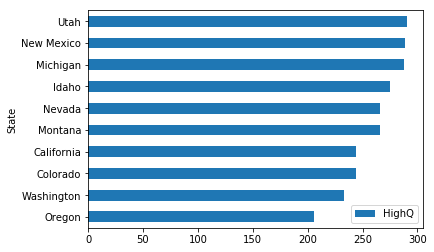

In [70]:
%matplotlib inline

df.sort_values('HighQ').head(10).plot(kind='barh', x = 'State', y = 'HighQ')


## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

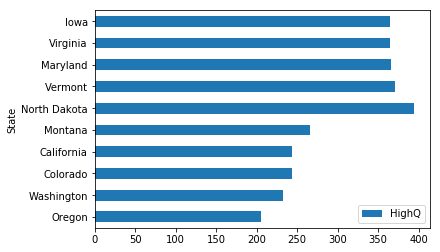

In [71]:
top_five = df.sort_values(by = 'HighQ', ascending = False ).head(5)

bottom_five = df.sort_values(by = 'HighQ').head(5)
pd.concat([bottom_five, top_five], ignore_index = True).plot(kind = 'barh', y = 'HighQ', x = 'State' )

In [72]:
#df[df.HighQ > 300]['feelings'] = 'expensive'

df.loc[df.HighQ > 300, 'feelings'] = 'expensive'

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

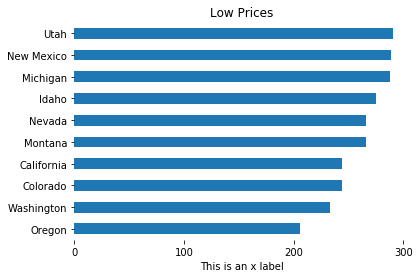

In [74]:
ax = df.sort_values('HighQ').head(10).plot(kind='barh', x = 'State', y = 'HighQ')

#Add a title
ax.set_title('Low Prices')

#Add a label to the bottom axis
ax.set_xlabel('This is an x label')

#Remove the label on the left axis
ax.set_ylabel("")

#Get rid of the boxes around everything
ax.set_frame_on(None)

#Remove the legend
ax.legend_.remove()

#Remove most of the tick marks
ax.set_xticks([0, 100, 200, 300])

#Add dollar signs for the bottom



In [75]:
#df.plot(x='State', y='HighQ', kind = 'barh', figsize = (5, 20), title = "Something")

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [76]:
import glob

In [77]:
filenames = glob.glob("data/*.csv")


## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [78]:
all_files = [pd.read_csv(file, na_values = "I feel bad for these guys -->", dtype = {'MedQ': str, 'Date': str}) for file in filenames]

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [79]:
all_files[0].head(2)
all_files[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37


In [80]:
#defining a new columne (filename)
all_files[0]['filename'] = filenames[0]

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [81]:
#zip
for filename, dataframe in zip(filenames, all_files):
    dataframe['filename'] = filename

In [94]:
filenames

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

In [82]:
all_files[0]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [83]:
final_data = pd.concat(all_files)

In [84]:
final_data.shape

(24990, 8)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [85]:
dates = final_data['filename'].str.extract('^data/weedprices(\d\d)(\d\d)(\d\d\d\d).csv')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


## Okay, now add all three columns back at once

You should rename the columns first!

In [86]:
dates.rename(columns = {0: 'Day', 1: 'Month', 2: 'Year'}, inplace = True)
dates
#axis = 0 for concat, ....
#pd.concat([df, extracted], axis =1)

,Day,Month,Year
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014
5,01,01,2014
6,01,01,2014
7,01,01,2014
8,01,01,2014
9,01,01,2014


In [87]:
dates['Date'] = dates['Day']+'/'+ dates['Month']+'/'+ dates['Year']

dates.head()


,Day,Month,Year,Date
0,01,01,2014,01/01/2014
1,01,01,2014,01/01/2014
2,01,01,2014,01/01/2014
3,01,01,2014,01/01/2014
4,01,01,2014,01/01/2014


In [88]:
#combined_df = final_data.merge(dates, left_on = '', right_on = '')

final_data['Date'] = dates['Date']

final_data.dtypes


State       object
HighQ       object
HighQN      object
MedQ        object
MedQN       object
LowQ        object
LowQN       object
filename    object
Date        object
dtype: object

In [89]:
final_data['MedQ'] = final_data['MedQ'].str.replace('$', '').astype(float)

In [90]:
final_data['DateTime']= pd.to_datetime(final_data['Date'])

## Plot the change in marijuana prices in Oregon over time

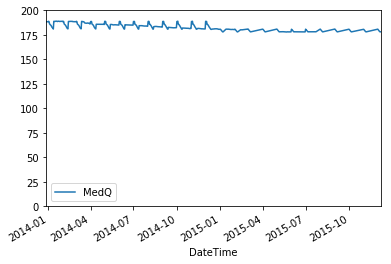

In [91]:
final_data[final_data['State'] == 'Oregon'].sort_values(by='DateTime').plot(kind = 'line', x = 'DateTime', y= 'MedQ', ylim = (0, 200))

## Plot the change in marijuana prices in all states over time

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


State
Alabama                 Axes(0.125,0.2;0.775x0.68)
Alaska                  Axes(0.125,0.2;0.775x0.68)
Arizona                 Axes(0.125,0.2;0.775x0.68)
Arkansas                Axes(0.125,0.2;0.775x0.68)
California              Axes(0.125,0.2;0.775x0.68)
Colorado                Axes(0.125,0.2;0.775x0.68)
Connecticut             Axes(0.125,0.2;0.775x0.68)
Delaware                Axes(0.125,0.2;0.775x0.68)
District of Columbia    Axes(0.125,0.2;0.775x0.68)
Florida                 Axes(0.125,0.2;0.775x0.68)
Georgia                 Axes(0.125,0.2;0.775x0.68)
Hawaii                  Axes(0.125,0.2;0.775x0.68)
Idaho                   Axes(0.125,0.2;0.775x0.68)
Illinois                Axes(0.125,0.2;0.775x0.68)
Indiana                 Axes(0.125,0.2;0.775x0.68)
Iowa                    Axes(0.125,0.2;0.775x0.68)
Kansas                  Axes(0.125,0.2;0.775x0.68)
Kentucky                Axes(0.125,0.2;0.775x0.68)
Louisiana               Axes(0.125,0.2;0.775x0.68)
Maine                   A

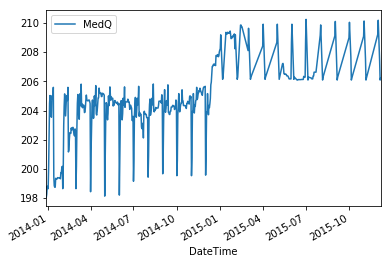

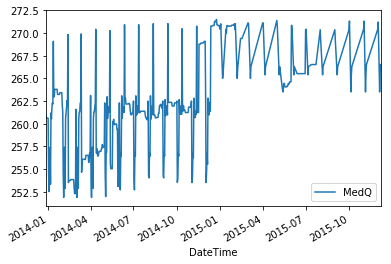

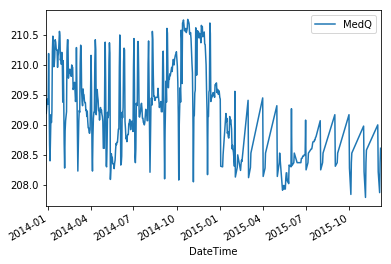

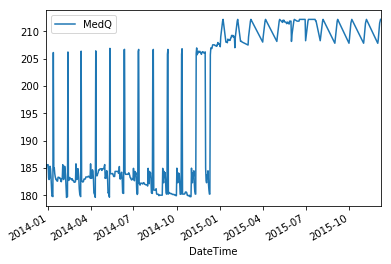

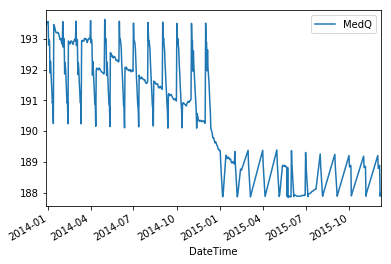

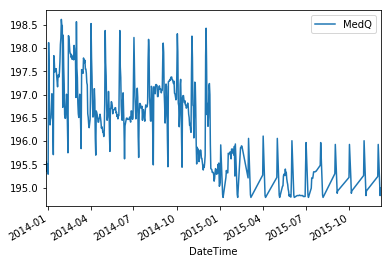

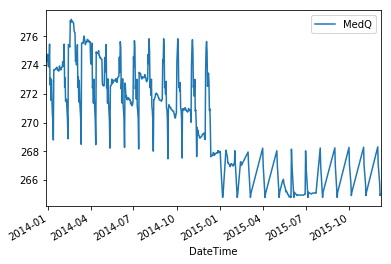

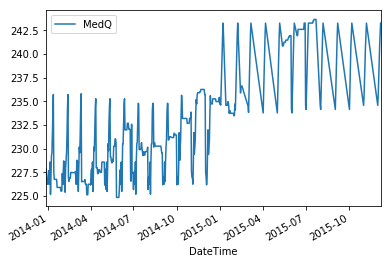

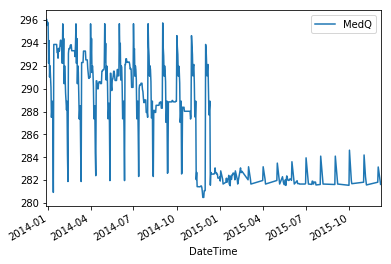

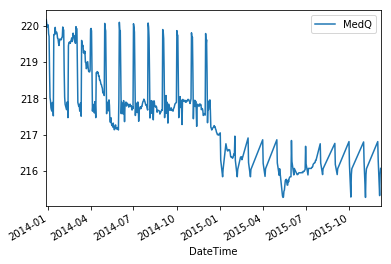

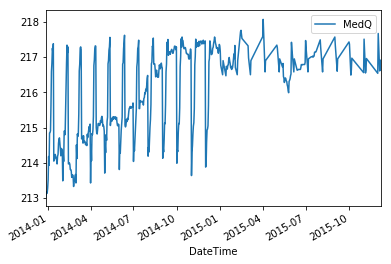

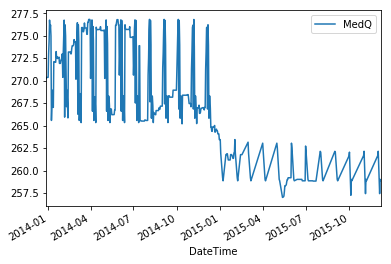

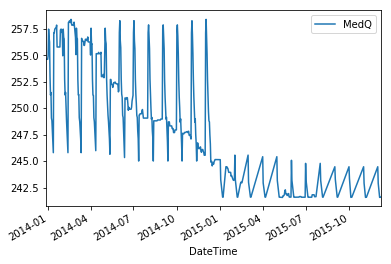

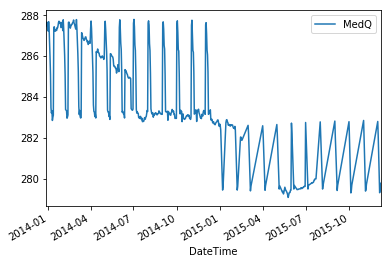

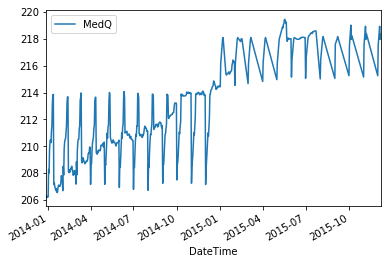

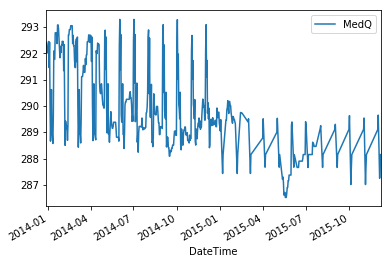

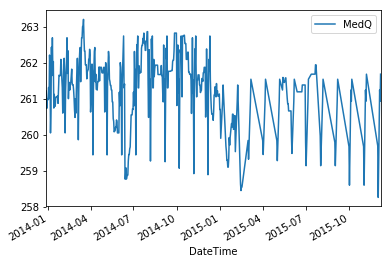

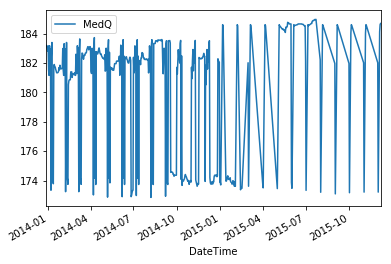

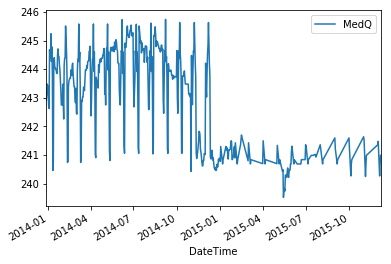

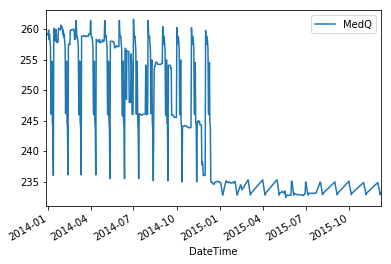

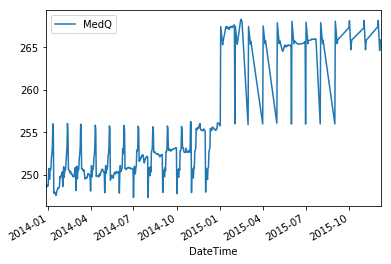

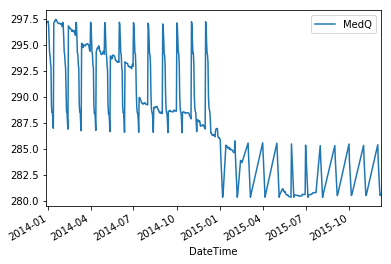

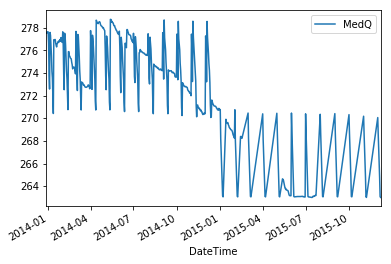

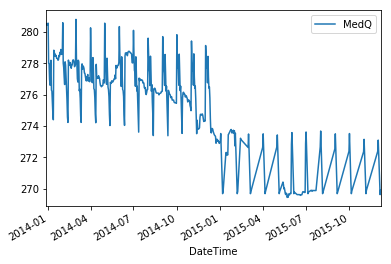

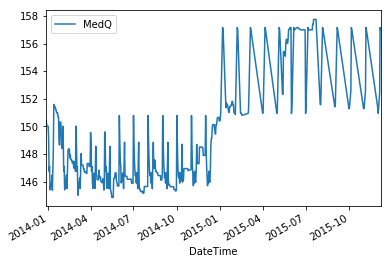

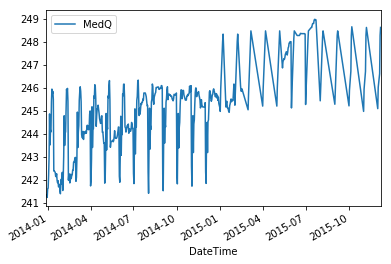

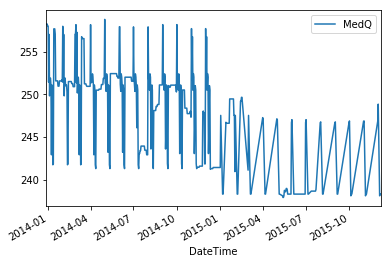

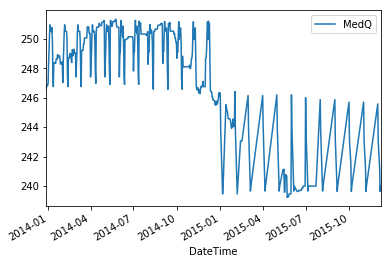

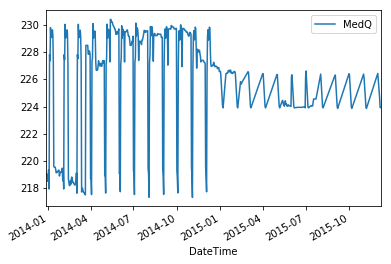

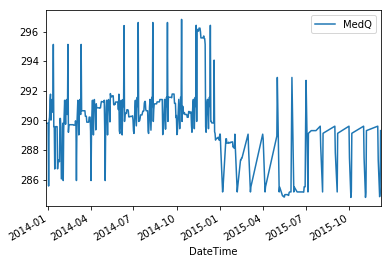

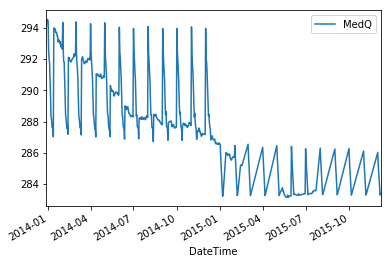

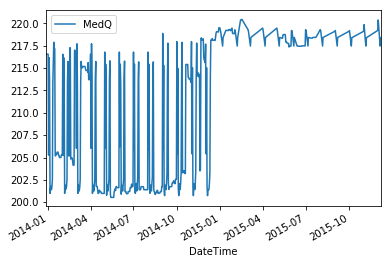

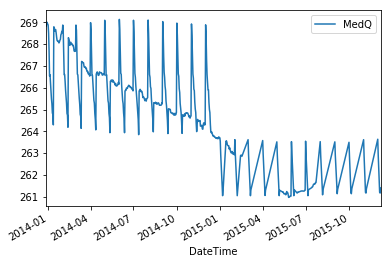

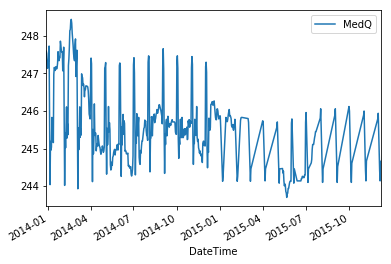

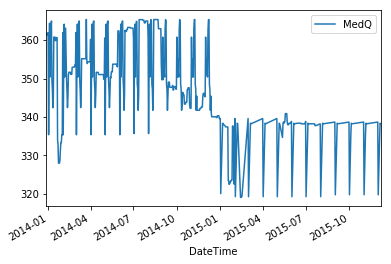

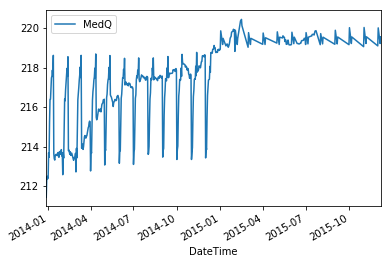

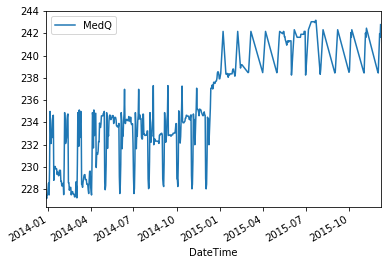

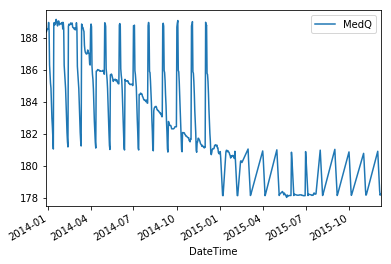

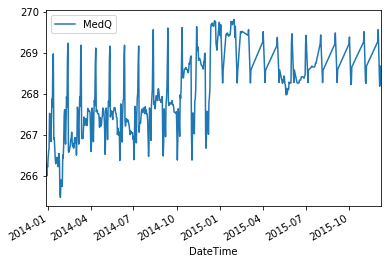

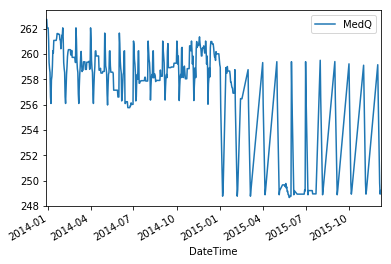

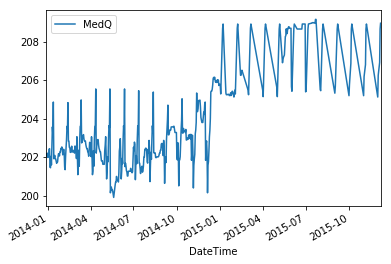

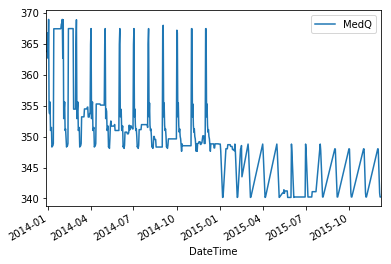

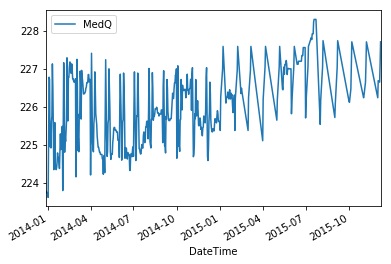

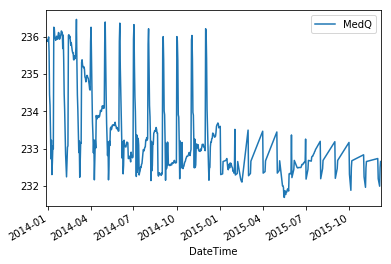

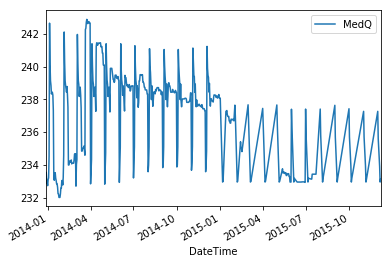

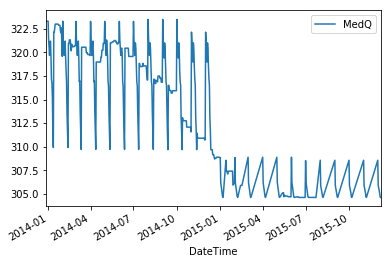

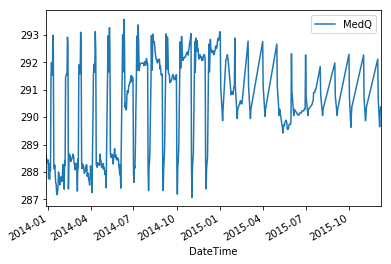

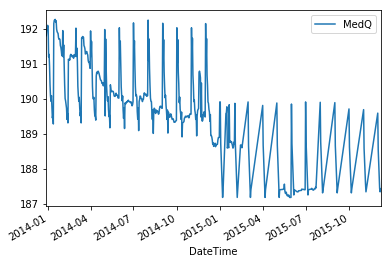

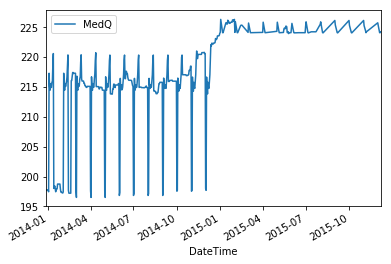

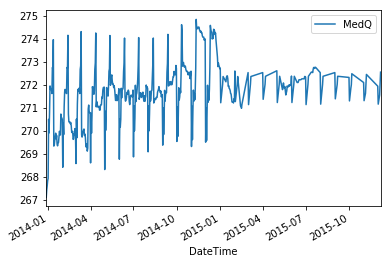

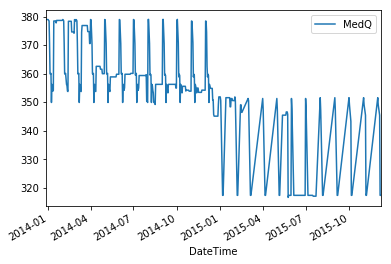

In [92]:
final_data.groupby('State').plot(kind = 'line', x = 'DateTime', y= 'MedQ')